In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
concrete_data = pd.read_excel(url)

In [4]:
predictors = concrete_data.iloc[:,:-1]
target = concrete_data.iloc[:,-1:].values

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

n_cols = X_train.shape[1]

In [5]:
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (824, 8)
Testing Features Shape: (206, 8)
Training Target Shape: (824, 1)
Testing Target Shape: (206, 1)


In [6]:
model = Sequential()
model.add(Dense(80, activation='relu', input_shape=(n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

c:\Users\everton.bandeira\AppData\Local\pypoetry\Cache\virtualenvs\imb-ai-engineering-_bd9iUP1-py3.10\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1094.1978   
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


Mean Squared Error (MSE): 285.0859639893697



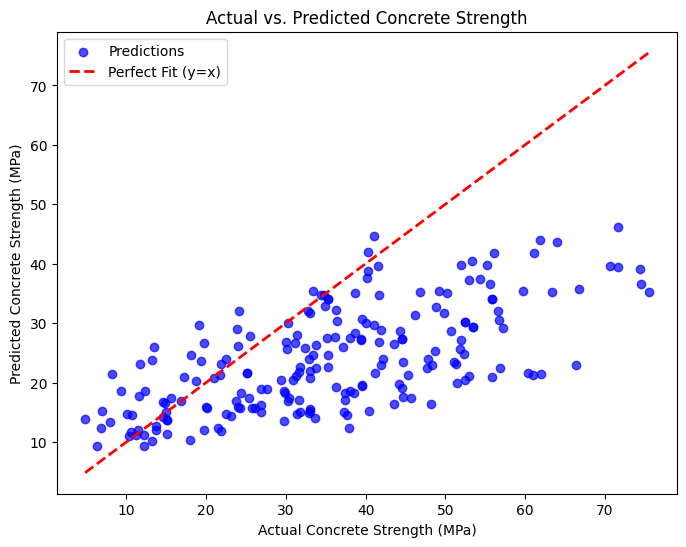

In [7]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit (y=x)")
plt.xlabel("Actual Concrete Strength (MPa)")
plt.ylabel("Predicted Concrete Strength (MPa)")
plt.title("Actual vs. Predicted Concrete Strength")
plt.legend()
plt.show()